In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("netflix_titles.csv")

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df['director'] = df['director'].fillna('Unknown')

In [11]:
df['cast'] = df['cast'].fillna('Unknown')

In [12]:
df['country'] = df['country'].fillna('Unknown')

In [13]:
df.dropna(subset=['date_added','rating','duration'], inplace = True)

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip()) #3. Tarih sütununu "Yazı" formatından "Tarih" formatına çeviriyoruz
# Başındaki/sonundaki boşlukları silip çeviriyoruz

In [17]:
df['year_added'] = df['date_added'].dt.year #4. Yıl ve Ay bilgisini ayıklayıp yeni sütun yapıyoruz (Analiz için lazım olacak)

In [18]:
df['month_added'] = df['date_added'].dt.month_name()

In [22]:
print(df.isnull().sum())#Bu kod satırı, veri temizliğinin röntgen cihazıdır. Tek bir cümleyle özetlemek gerekirse: "Hangi sütunda kaç tane eksik (boş) veri var, bana sayısını ver" demektir.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


In [23]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September


In [40]:
plt.figure(figsize=(6,4))#grafik boyutunu ayarlıyoruz(Genişlik.yükseklik)

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Netflix: Film ve Dizi Sayıları')

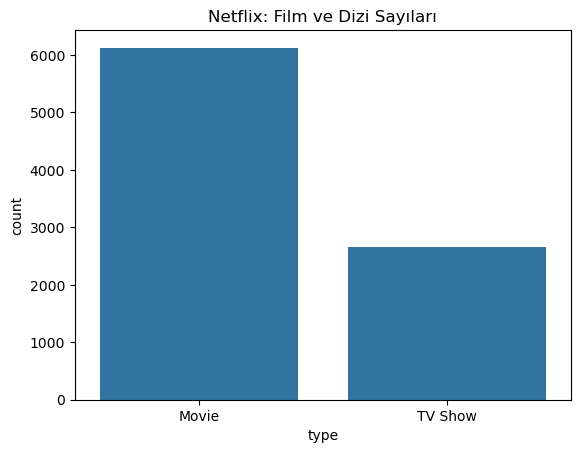

In [45]:
sns.countplot(x='type', data=df) # Seaborn kütüphanesi ile sayım grafiği (countplot) çiziyoruz
# x='type' diyerek "type" sütunundaki Film/Dizi verilerini say diyoruz
plt.title('Netflix: Film ve Dizi Sayıları')

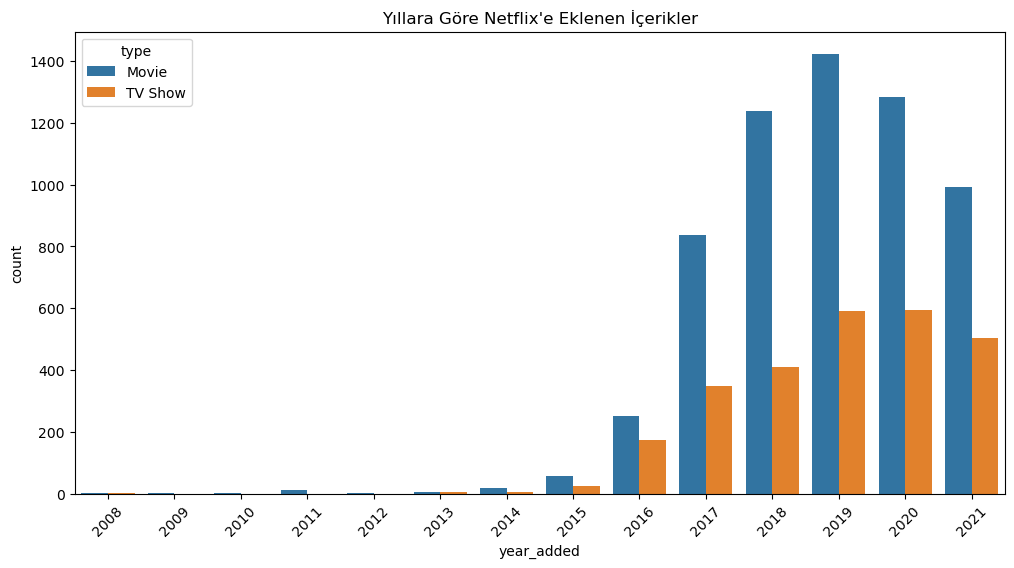

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [56]:
# Grafiği biraz genişletelim ki yıllar sığsın (Genişlik: 12, Yükseklik: 6)
plt.figure(figsize=(12, 6))
# x eksenine yılları koyuyoruz, hue='type' diyerek Film/Dizi ayrımı yapıyoruz
sns.countplot(x='year_added', data=df, hue='type')
#Başlık ekleyelim
plt.title('Yıllara Göre Netflix\'e Eklenen İçerikler')
#Yıllar üst üste binmesin diye x ekseni yazılarını 45 derece çevirelim
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))


first_country
United States     3202
India             1008
Unknown            829
United Kingdom     627
Canada             271
Japan              257
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


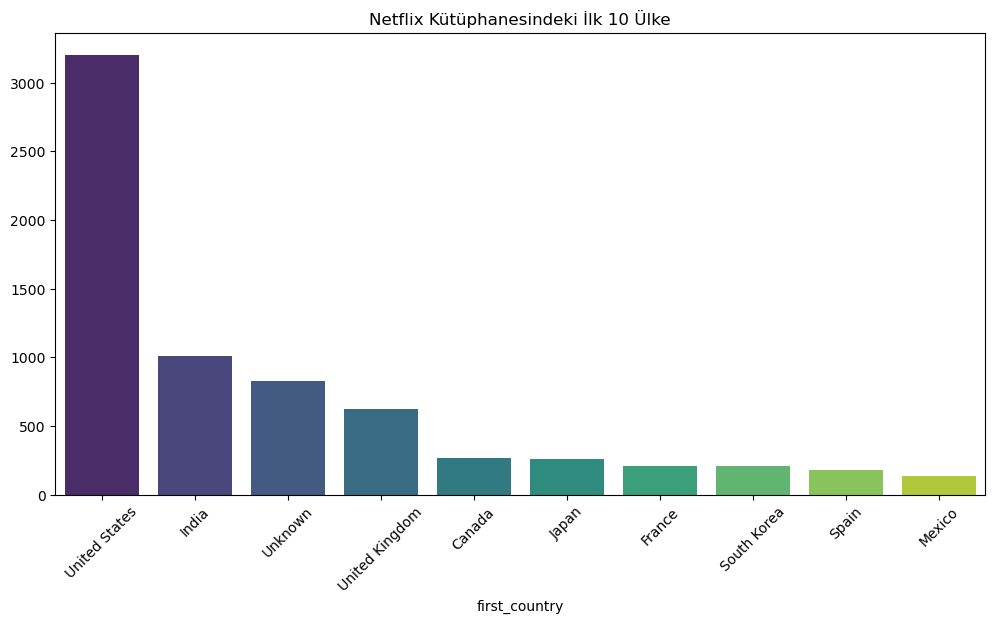

In [57]:
# 1. Eğer birden fazla ülke varsa, virgülden önceki ilkini alıyoruz
# (Örn: "Turkey, Germany" -> "Turkey" oluyor)
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])

#2. En çok tekrar eden ilk 10 ülkeyi buluyoruz
top_countries = df['first_country'].value_counts().head(10)

#3.sonuçları görelim
print(top_countries)

#4 Grafik çizelim(Barplot)
plt.figure(figsize=(12, 6))

# DÜZELTME BURADA YAPILDI:
# 1. hue=top_countries.index diyerek renklerin ülkelere göre atanacağını belirttik.
# 2. legend=False diyerek yan tarafta gereksiz bilgi kutusu çıkmasını engelledik.
sns.barplot(
    x=top_countries.index, 
    y=top_countries.values, 
    palette='viridis', 
    hue=top_countries.index, 
    legend=False
)

plt.title('Netflix Kütüphanesindeki İlk 10 Ülke')
plt.xticks(rotation=45)
plt.show()

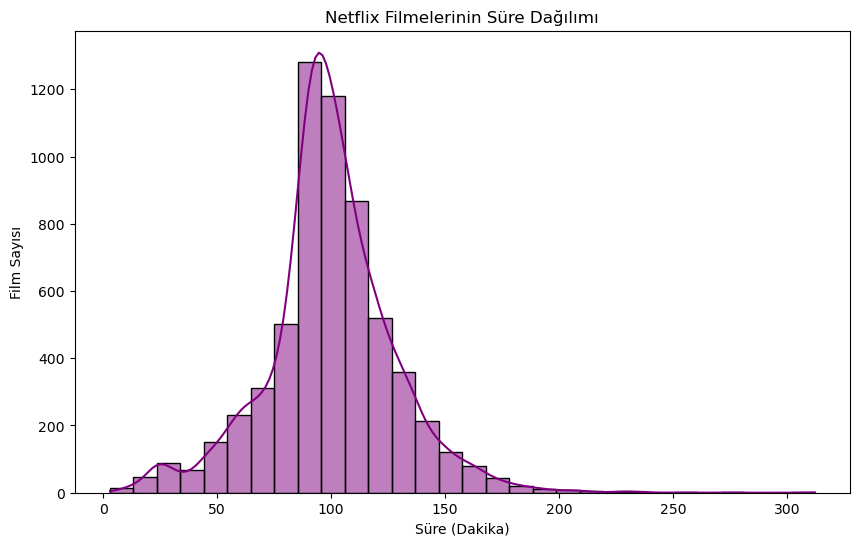

In [61]:
# 1. Sadece "Movie" olanları alıyoruz (Dizilerin süresi "Sezon" olduğu için karıştırmıyoruz)
df_movies = df[df['type'] == 'Movie'].copy()

# 2. "90 min" yazısındaki "min" kısmını silip sayıyı tam sayıya çeviriyoruz
df_movies['duration_min'] = df_movies['duration'].str.replace('min','').astype(int)

#3. Histogram Grafiği(Dağılım)
plt.figure(figsize=(10,6))
sns.histplot(df_movies['duration_min'], bins=30, kde=True, color='purple')

plt.title('Netflix Filmelerinin Süre Dağılımı')
plt.xlabel('Süre (Dakika)')
plt.ylabel('Film Sayısı')
plt.show()

Yorum: Bu da demek oluyor ki Netflix'teki "standart" film süresi 1.5 saat civarında. 2.5 saati (150 dk) geçen filmler ise "istisna" (outlier) olarak sağ tarafta kuyruk oluşturmuş.

In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


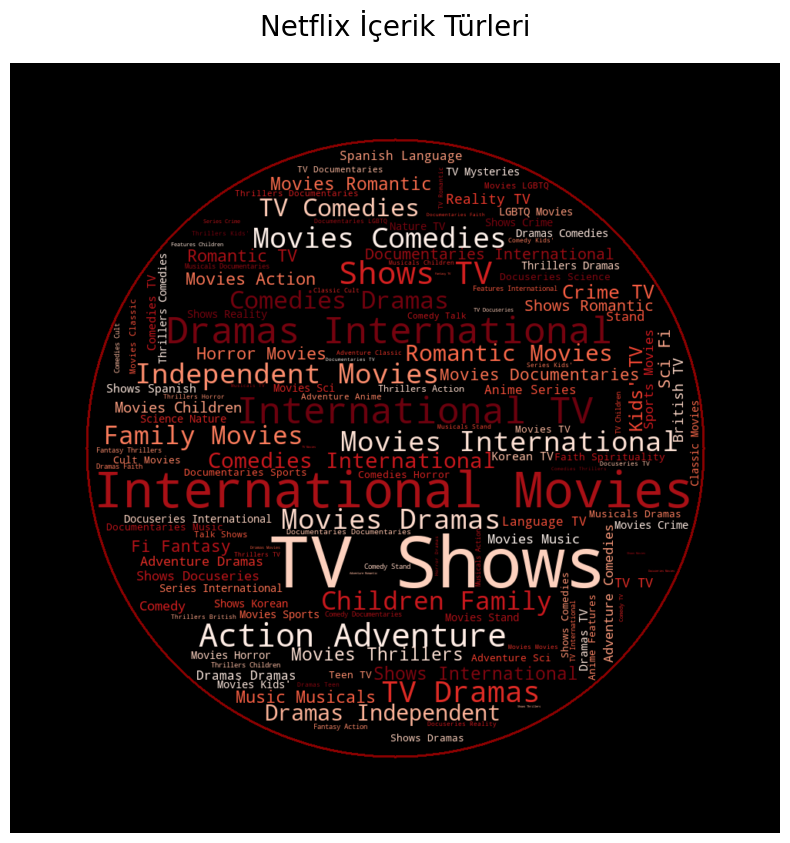

In [64]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

# 1. Daire şeklinde bir maske (kalıp) oluşturuyoruz
# (Burası matematiksel bir hile, dışarıdan resim yüklemene gerek kalmasın diye kodla yapıyoruz)
x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

# 2. Metni hazırlıyoruz
text = " ".join(cat for cat in df['listed_in'])

# 3. Profesyonel Ayarlar
wordcloud = WordCloud(
    background_color="black",    # Arka plan: Siyah (Sinematik)
    colormap="Reds",             # Renkler: Sadece Kırmızı tonları (Netflix Kırmızısı)
    mask=mask,                   # Şekil: Az önce yarattığımız daire
    width=1000, height=1000,     # Çözünürlük
    max_words=150,               # En önemli 150 kelime (Kalabalığı önler)
    contour_width=3,             # Çerçeve kalınlığı
    contour_color='darkred'      # Çerçeve rengi
).generate(text)

# 4. Çizim
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Eksenleri kapat
plt.title("Netflix İçerik Türleri", fontsize=20, color='black', pad=20)
plt.show()